In [1]:
import ctypes
import os
import glob
import time
import astropy.units as u
import astropy.io.fits as fits
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from pocs.camera.fli import Camera


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]
/mnt/data/ajh/Documents/LSB/HuntsmanTelephotoArray/POCS/pocs/utils/images/__init__.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/mnt/data/ajh/Documents/virtualenvs/python3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/mnt/data/ajh/Documents/virtualenvs/python3.5.2/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.s

In [4]:
cam = Camera(port='/dev/fliusb0')

In [5]:
cam.is_connected

True

In [6]:
cam.uid

'ML5232816'

In [7]:
cam2 = Camera(port='ML5232816')

/mnt/data/ajh/Documents/LSB/HuntsmanTelephotoArray/POCS/pocs/camera/fli.py:83: UserWarning: Device node /dev/fliusb0 already in use!
  warn(message)


In [8]:
cam2.is_connected

False

In [9]:
del(cam)

In [10]:
cam3 = Camera(port='ML5232816')

In [11]:
cam3.is_connected

True

In [12]:
cam3.uid

'ML5232816'

In [13]:
cam4 = Camera(port='/dev/fliusb0')

/mnt/data/ajh/Documents/LSB/HuntsmanTelephotoArray/POCS/pocs/camera/fli.py:83: UserWarning: Device node /dev/fliusb0 already in use!
  warn(message)


In [14]:
cam4.is_connected

False

In [15]:
cam3.cooling_power

34.0

In [16]:
cam3.target_temperature

<Quantity 25. deg_C>

In [17]:
cam3.target_temperature = 10 * u.Celsius

In [18]:
cam3.target_temperature

<Quantity 10. deg_C>

In [19]:
cam3.cooling_power

34.0

In [20]:
cam3.cooling_enabled

True

In [21]:
cam3.cooling_enabled = False

NotImplementedError: Cannot disable cooling on FLI cameras

In [22]:
print(cam3)

FLI Camera (ML5232816) on /dev/fliusb0


In [23]:
cam3._info

{'array corners': ((0, 0), (8304, 6220)),
 'array height': 6220,
 'array width': 8304,
 'camera model': 'MicroLine ML50100',
 'firmware version': 516,
 'hardware version': 256,
 'pixel height': <Quantity 6.00000021 um>,
 'pixel width': <Quantity 6.00000021 um>,
 'serial number': 'ML5232816',
 'visible corners': ((64, 45), (8240, 6177)),
 'visible height': 6132,
 'visible width': 8176}

In [24]:
for fname in glob.glob('*.fits'):
    os.unlink(fname)

In [25]:
exp_event = cam3.take_exposure(seconds=1, filename='light_1.fits')
exp_event.wait()

True

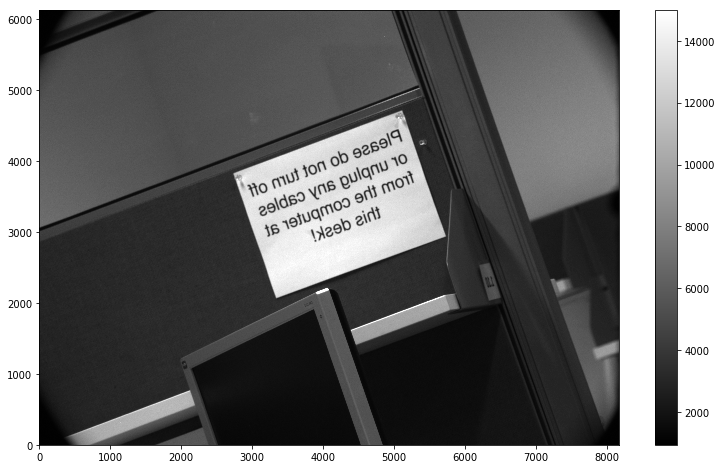

In [26]:
plt.imshow(fits.getdata('light_1.fits'), cmap='gray', aspect='equal', vmax=15000)
plt.colorbar()
plt.gcf().set_size_inches(13,8)

In [27]:
cam3.take_exposure(seconds=1/60 * u.minute, filename='dark_1.fits', dark=True, blocking=True)

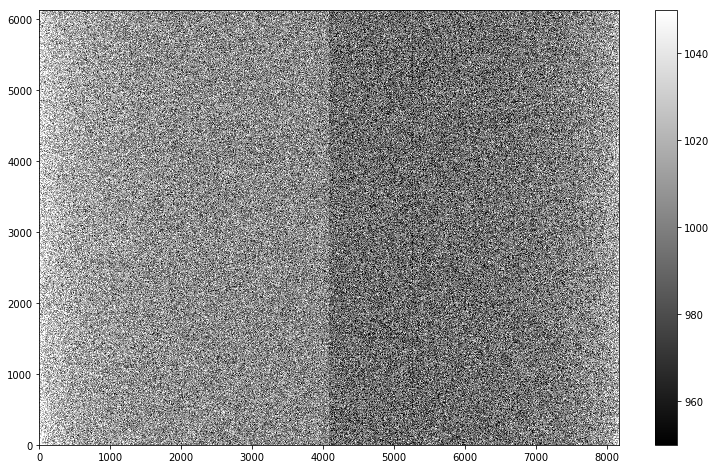

In [28]:
plt.imshow(fits.getdata('dark_1.fits'), cmap='gray', aspect='equal', vmin=950, vmax=1050)
plt.colorbar()
plt.gcf().set_size_inches(13,8)

In [29]:
cam3.take_exposure(seconds=1, filename='collision_1.fits')
cam3.take_exposure(seconds=1, filename='collision_2.fits')

/mnt/data/ajh/Documents/LSB/HuntsmanTelephotoArray/POCS/pocs/camera/fli.py:219: UserWarning: Attempt to start exposure on FLI Camera (ML5232816) while exposure in progress! Waiting...
  warn(message)


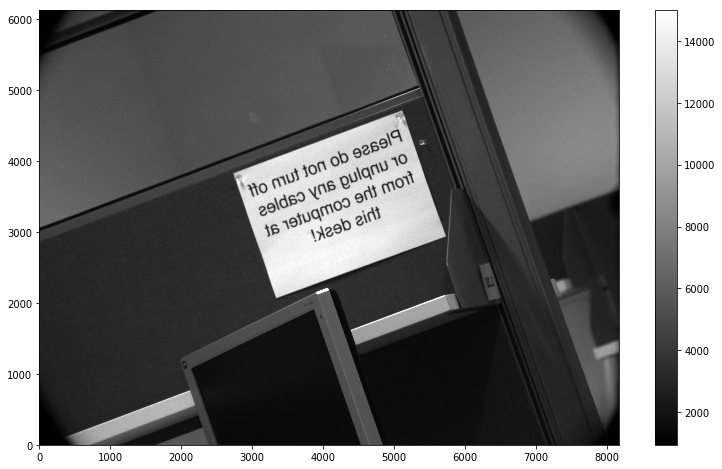

In [31]:
plt.imshow(fits.getdata('collision_1.fits'), cmap='gray', aspect='equal', vmax=15000)
plt.colorbar()
plt.gcf().set_size_inches(13,8)

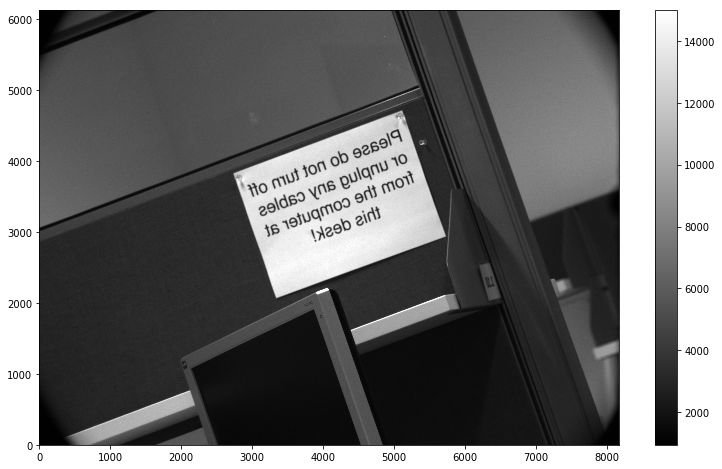

In [33]:
plt.imshow(fits.getdata('collision_2.fits'), cmap='gray', aspect='equal', vmax=15000)
plt.colorbar()
plt.gcf().set_size_inches(13,8)